# Life Expectancy and GDP
## Data Visualization Portfolio Project

### Index

* 1. Understanding the variables in the dataset
* 2. Data cleaning and pre-processing
* 3. New variables
* 4. Data visualizations
* 5. Linear regression
* 6. Conclusions
* 7. References

## 1. Understanding the variables in the dataset

This dataset contains a record of life expectancy and Gross Domestic Product (GDP) from six countries. These records have been stored yearly from 2000 to 2015. About these concepts:

**Life expectancy at birth**: 'The average number of years that a newborn could expect to live, if he or she were to pass through life exposed to the sex- and age-specific death rates prevailing at the time of his or her birth, for a specific year, in a given country, territory, or geographic area'¹.

**GDP**: 'According Gross domestic product (GDP) is the standard measure of the value added created through the production of goods and services in a country during a certain period'².

## 2. Data cleaning and pre-processing

In [22]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Load the data
df1 = pd.read_csv('all_data.csv')

# Rename column names in the dataset to make it easier to analyse
df1.rename(columns={'Country': 'country', 'Year': 'year', 'Life expectancy at birth (years)': \
                   'life_exp', 'GDP': 'gdp'}, inplace=True)

# To be able to change one of the countries' names, I turn the data type of 'Country' to string
df1['country'] = df1.country.astype('string')

# I change 'United States of America' for 'United States' so it doesn't overlap with other
## country names in the x axis
df1.country = df1.country.apply(lambda x: 'United States' if x == 'United States of America' \
                                else x)

## 3. New variables

In [6]:
# Data summary
data_summary = df1.describe(include = 'all')

# Mean for life expectancy and GDP (absolute)
life_exp_mean = data_summary.life_exp.loc['mean']
gdp_mean = data_summary.gdp.loc['mean']

# Variables for countries and years
countries = df1.country.unique()
years = df1.year.unique()

# New DataFrame with average life expectancy at birth and GDP per country
life_exp_and_gdp_means_by_country = pd.DataFrame([], columns=['country', 'life_exp_mean', 'gdp_mean'])
life_exp_and_gdp_means_by_country.country = df1.country.unique()
life_exp_and_gdp_means_by_country.life_exp_mean = df1.groupby('country').life_exp.mean()\
.reset_index().life_exp
life_exp_and_gdp_means_by_country.gdp_mean = df1.groupby('country').gdp.mean()\
.reset_index().gdp

# An array created for later linear regression model
future_years = np.arange(2016, 2030).reshape(-1, 1)

## 4. Data visualizations

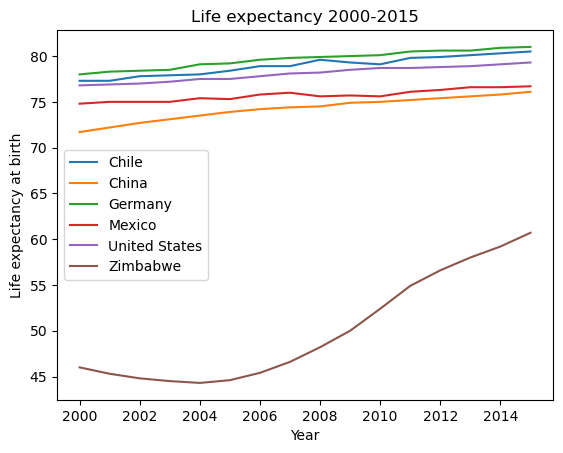

In [23]:
# Life expectancy 2000-2015
for i in countries:
    plt.plot(df1[df1.country == i].year, df1[df1.country == i].life_exp)
  
plt.legend(countries)
plt.xlabel('Year')
plt.ylabel('Life expectancy at birth')
plt.title('Life expectancy 2000-2015')
plt.show()

We can see that there is quite a difference between Zimbabwe's values and the rest of the countries'. Because of that, I am going to divide this line chart in two. 

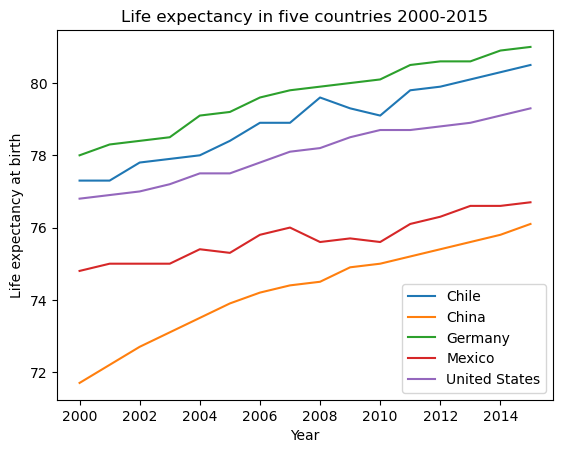

In [8]:
five_countries = list(countries)
five_countries.remove('Zimbabwe')

# Life expectancy at birth in five countries (Zimbabwe excluded)
for i in five_countries:
    plt.plot(df1[df1.country == i].year, df1[df1.country == i].life_exp)
plt.legend(five_countries)
plt.xlabel('Year')
plt.ylabel('Life expectancy at birth')
plt.title('Life expectancy in five countries 2000-2015')
plt.show()

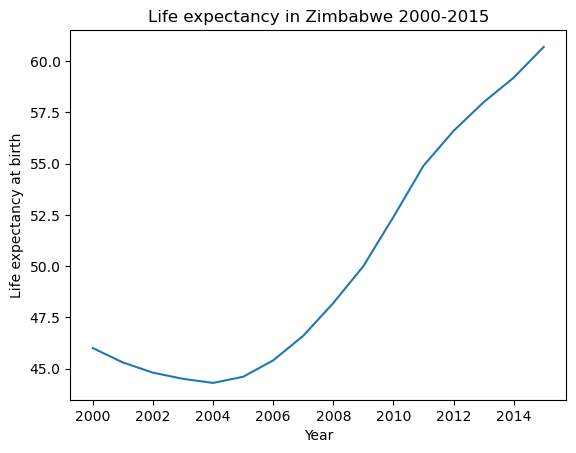

In [9]:
# Life expectancy in Zimbabwe 2000-2015
plt.plot(df1[df1.country == 'Zimbabwe'].year, df1[df1.country == 'Zimbabwe'].life_exp)
plt.xlabel('Year')
plt.ylabel('Life expectancy at birth')
plt.title('Life expectancy in Zimbabwe 2000-2015')
plt.show()

Now, lets display the GDP also with line charts. 

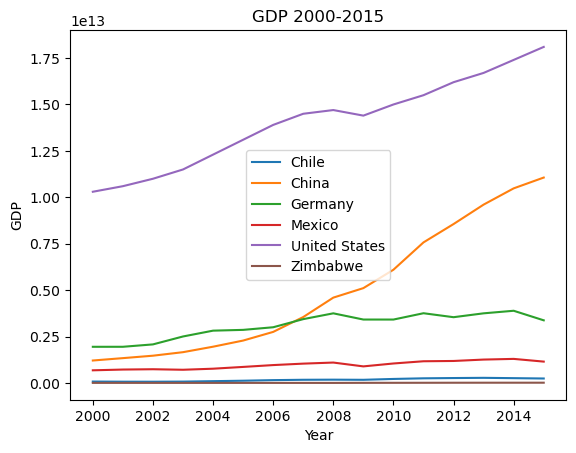

In [10]:
# GDP 2000-2015
for i in countries:
    plt.plot(df1[df1.country == i].year, df1[df1.country == i].gdp)
plt.legend(countries)
plt.xlabel('Year')
plt.ylabel('GDP')
plt.title('GDP 2000-2015')
plt.show()

Same as before, the values of one country (United States in this case) are far from the other countries'. Again, lets turn this graph into two.

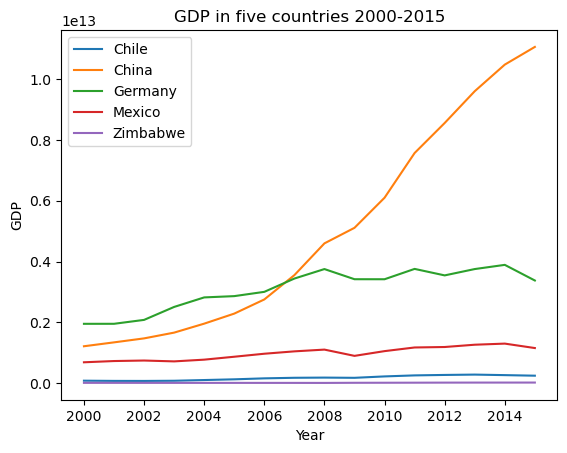

In [11]:
five_countries2 = list(countries)
five_countries2.remove('United States')

# GDP in five countries (Zimbabwe excluded)
for i in five_countries2:
    plt.plot(df1[df1.country == i].year, df1[df1.country == i].gdp)
plt.legend(five_countries2)
plt.xlabel('Year')
plt.ylabel('GDP')
plt.title('GDP in five countries 2000-2015')
plt.show()

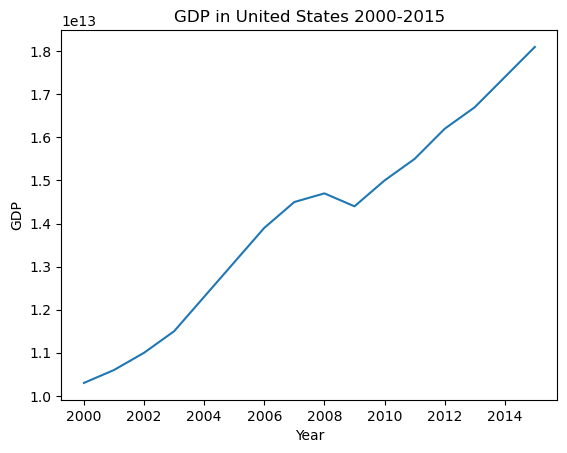

In [12]:
# GDP in United States 2000-2015
plt.plot(df1[df1.country == 'United States'].year, df1[df1.country == 'United States'].gdp)
plt.xlabel('Year')
plt.ylabel('GDP')
plt.title('GDP in United States 2000-2015')
plt.show()

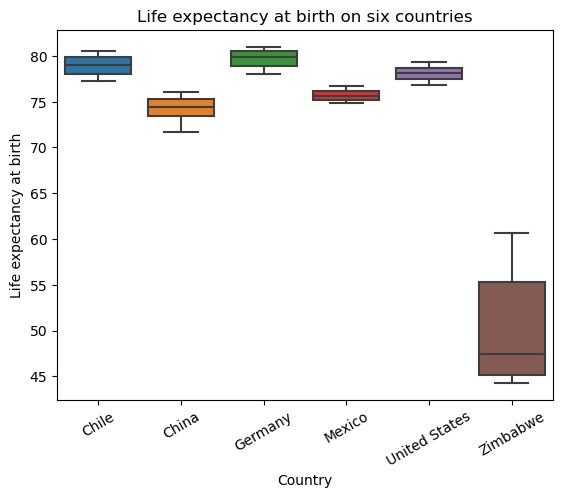

In [13]:
# Life expectancy variation of the six countries
sns.boxplot(x='country', y='life_exp', data=df1)
plt.xlabel('Country')
plt.ylabel('Life expectancy at birth')
plt.title('Life expectancy at birth on six countries')
plt.xticks(rotation = 30)
plt.show()

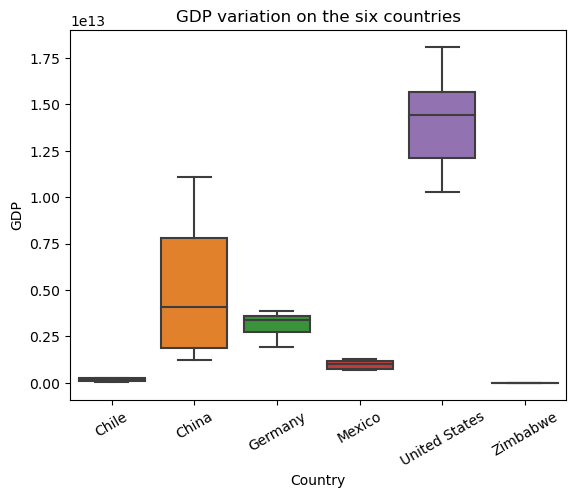

In [14]:
# GDP variation of the six countries
sns.boxplot(x='country', y='gdp', data=df1)
plt.xlabel('Country')
plt.ylabel('GDP')
plt.title('GDP variation on the six countries')
plt.xticks(rotation = 30)
plt.show()

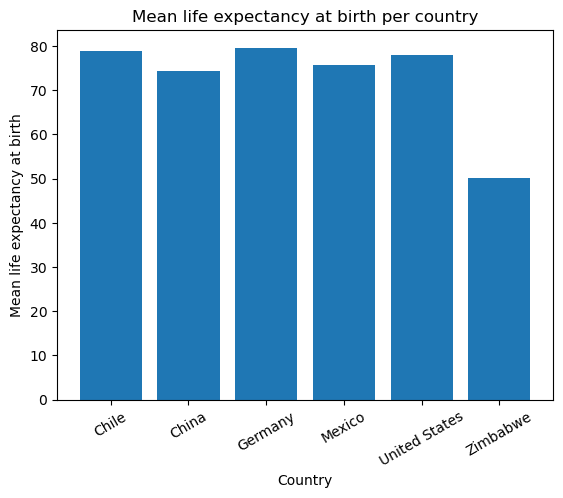

In [15]:
# Bar charts for average life expectancy at birth per country
plt.bar(life_exp_and_gdp_means_by_country.country, life_exp_and_gdp_means_by_country.life_exp_mean)
plt.xlabel('Country')
plt.ylabel('Mean life expectancy at birth')
plt.title('Mean life expectancy at birth per country')
plt.xticks(rotation = 30)
plt.show()

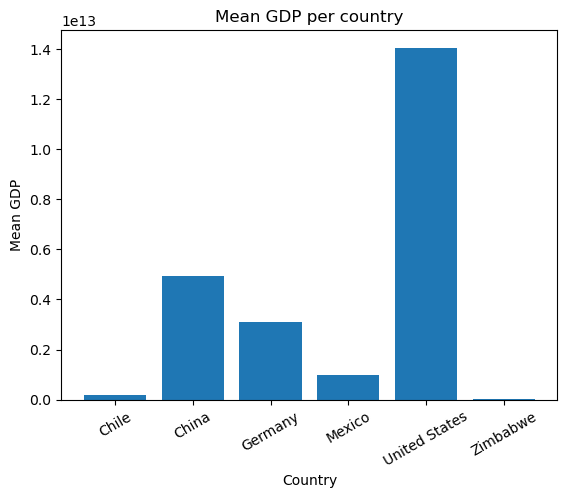

In [16]:
# Bar charts for average GDP per country
plt.bar(life_exp_and_gdp_means_by_country.country, life_exp_and_gdp_means_by_country.gdp_mean)
plt.xlabel('Country')
plt.ylabel('Mean GDP')
plt.title('Mean GDP per country')
plt.xticks(rotation = 30)
plt.show()

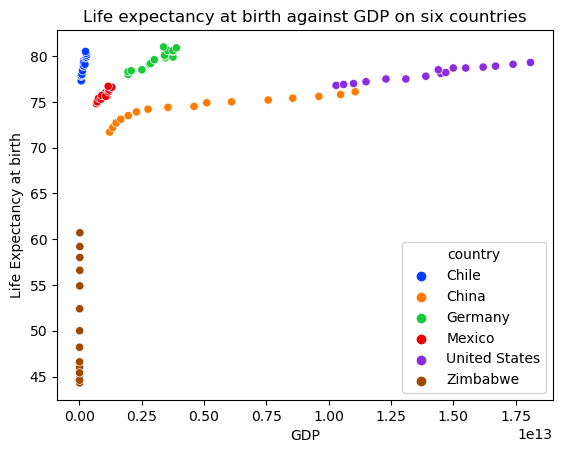

In [17]:
# Life expectancy at birth against GDP on six countries
sns.scatterplot(x = 'gdp', y = 'life_exp', hue = 'country', palette = 'bright', data = df1)
plt.xlabel('GDP')
plt.ylabel('Life Expectancy at birth')
plt.title('Life expectancy at birth against GDP on six countries')
plt.show()

## 5. Linear regression

Now, using a linear regression model, lets make a prediction on what life expectancy and GDP would be like for the six countries in the next years (2016-2030). 

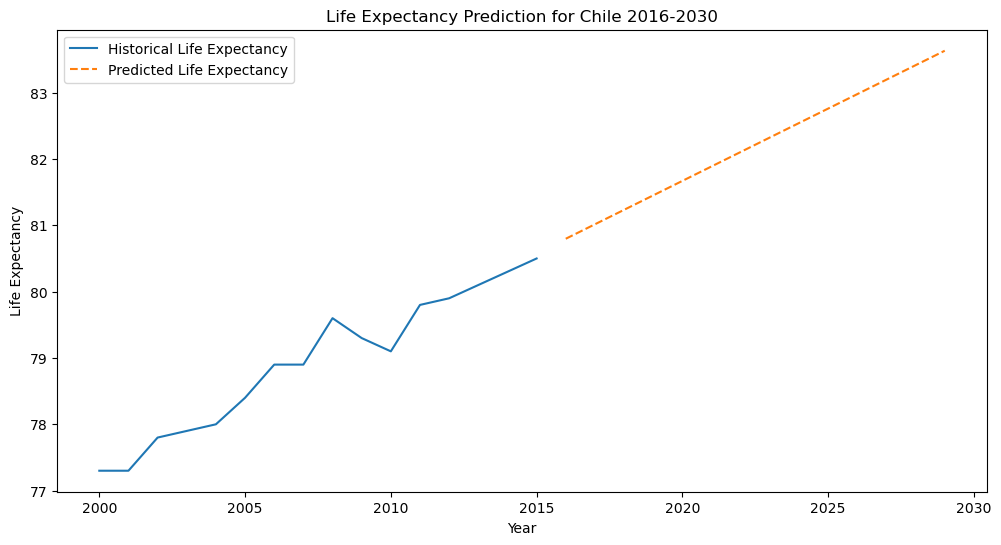

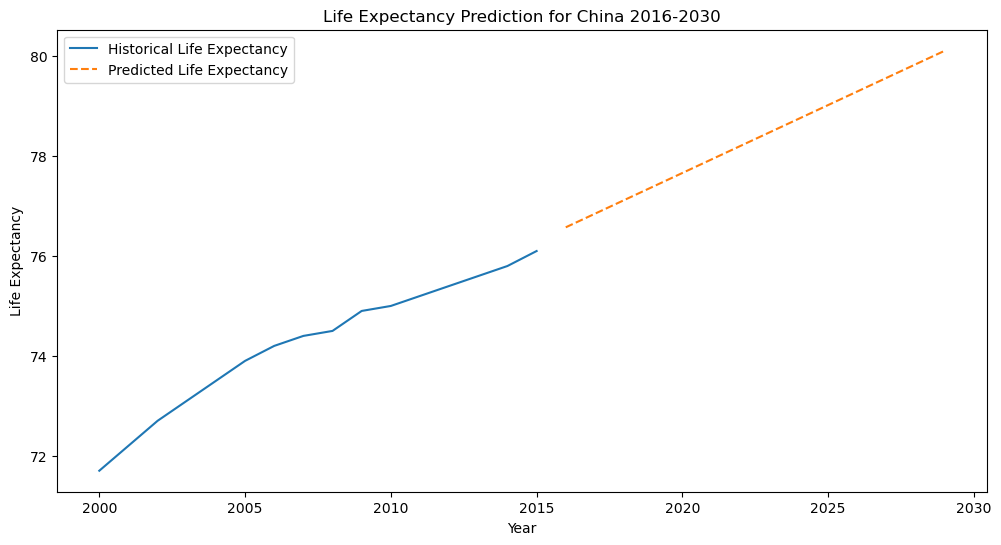

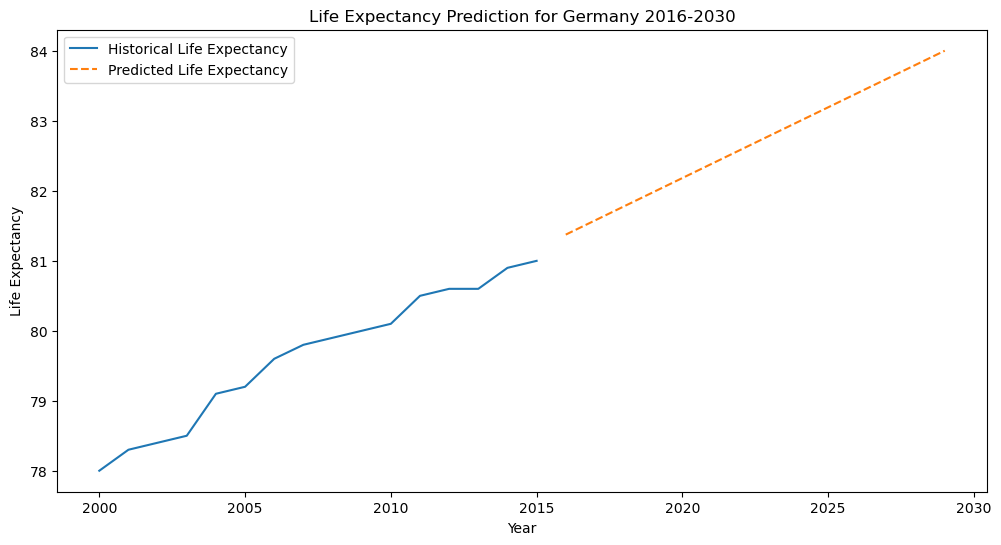

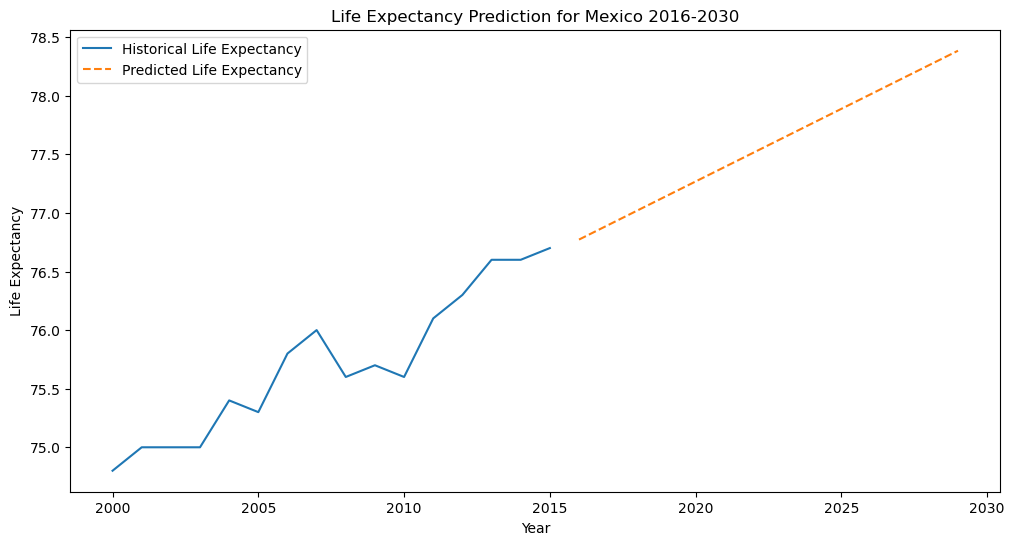

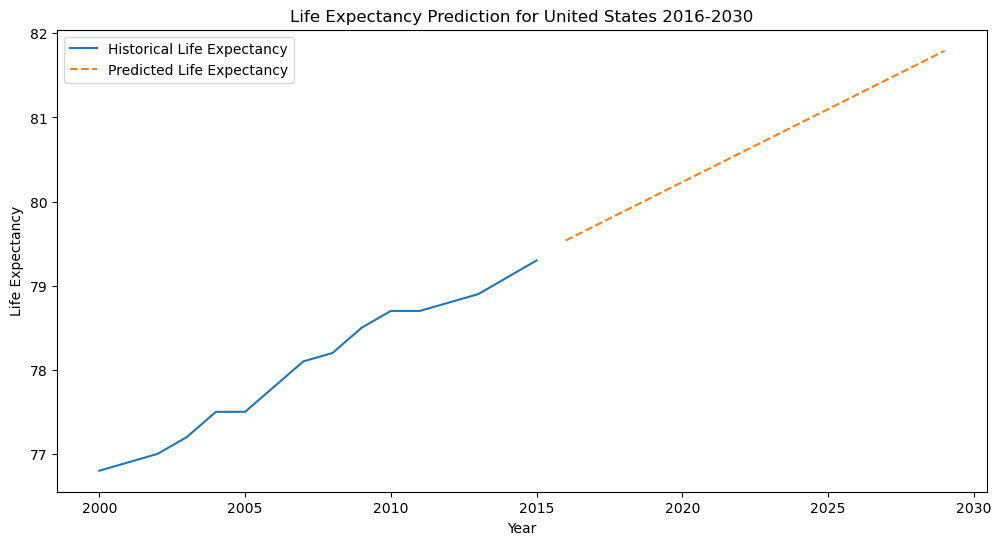

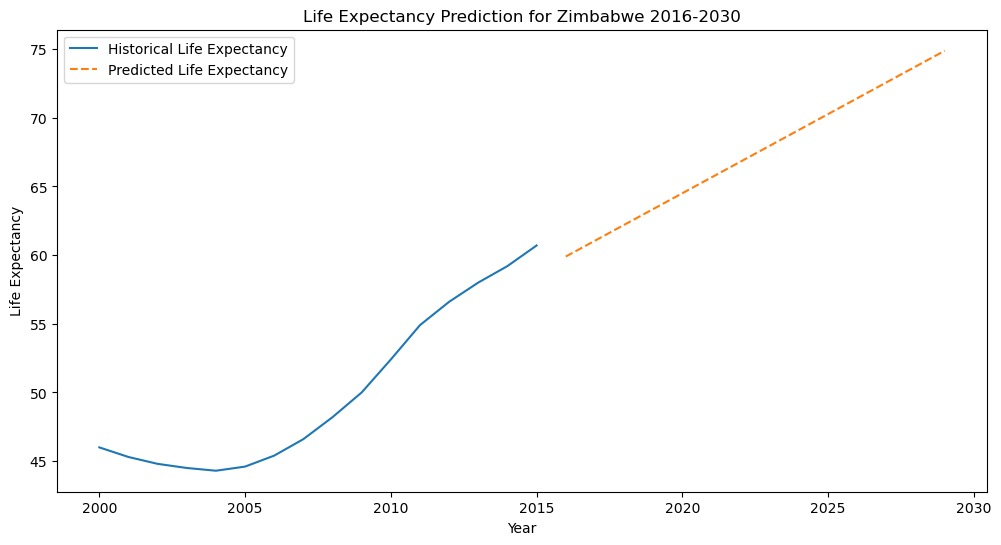

In [20]:
# Machine learning model fitting and visualization of the prediction on life expectancy per country

for i in countries:
    years_from_df = df1[df1.country == i]['year'].values.reshape(-1, 1)
    life_expectancy = df1[df1.country == i]['life_exp'].values
    model_life = LinearRegression()
    model_life.fit(years_from_df, life_expectancy)
    life_predictions = model_life.predict(future_years)
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=df1[df1.country == i], x='year', y='life_exp', label='Historical Life Expectancy')
    plt.plot(future_years, life_predictions, label='Predicted Life Expectancy', linestyle='--')
    plt.xlabel('Year')
    plt.ylabel('Life Expectancy')
    plt.title(f'Life Expectancy Prediction for {i} 2016-2030')
    plt.legend()
    plt.show()

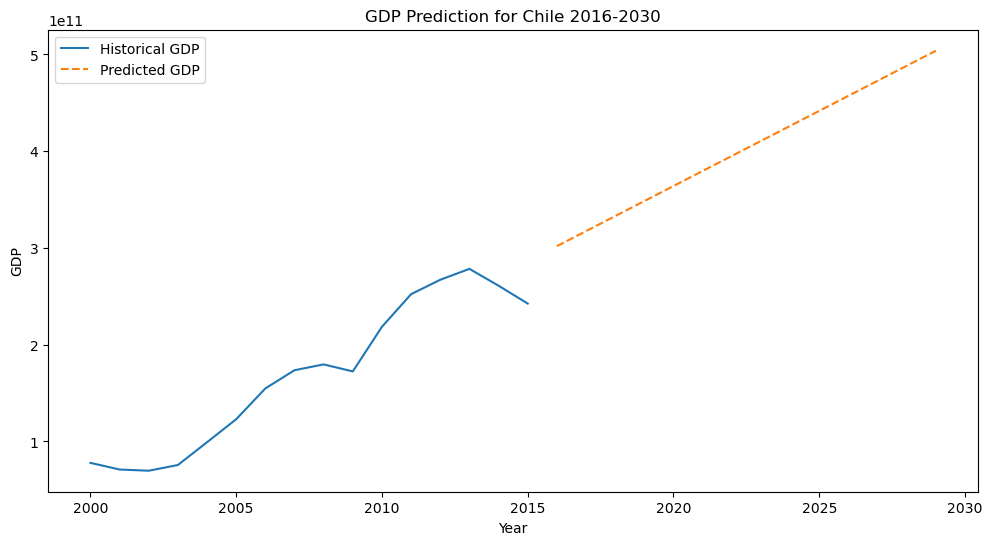

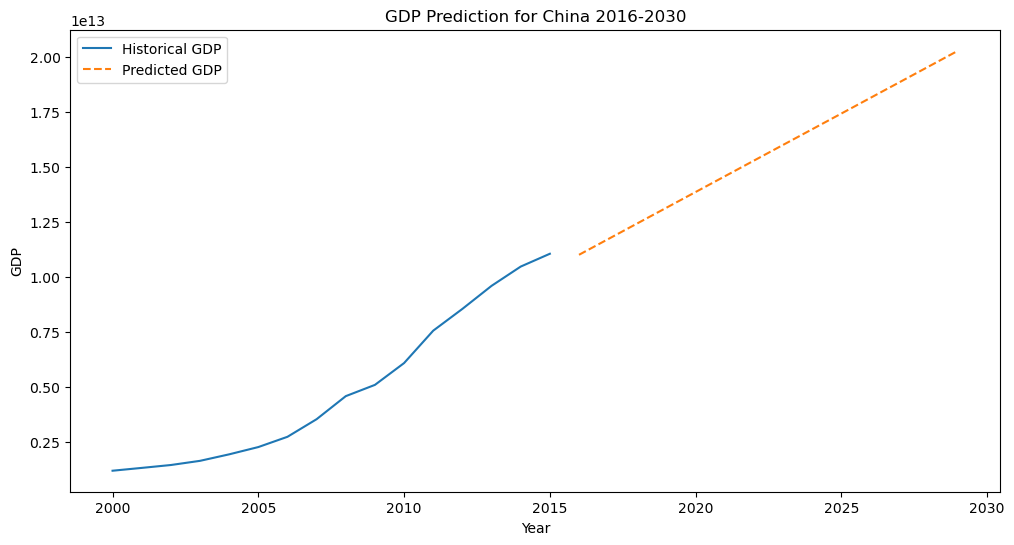

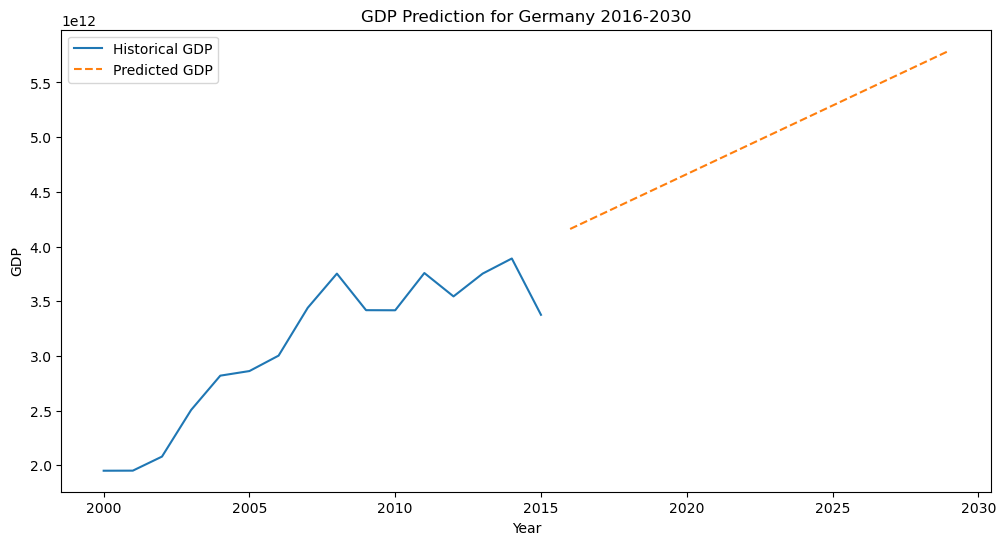

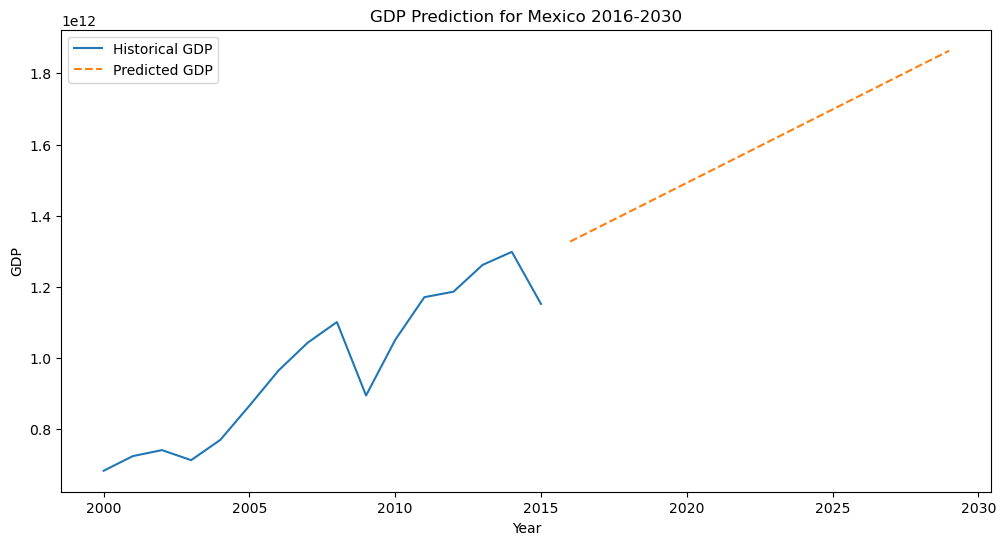

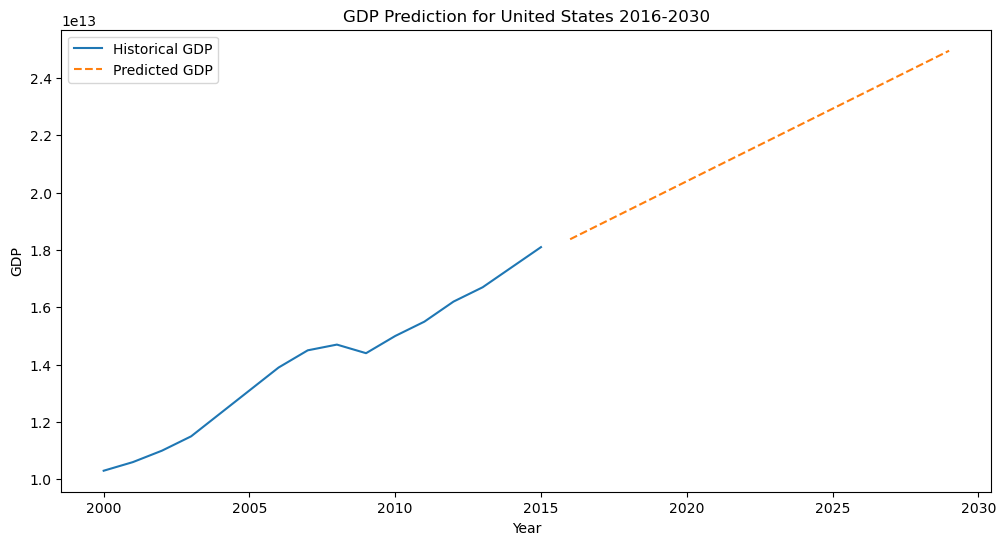

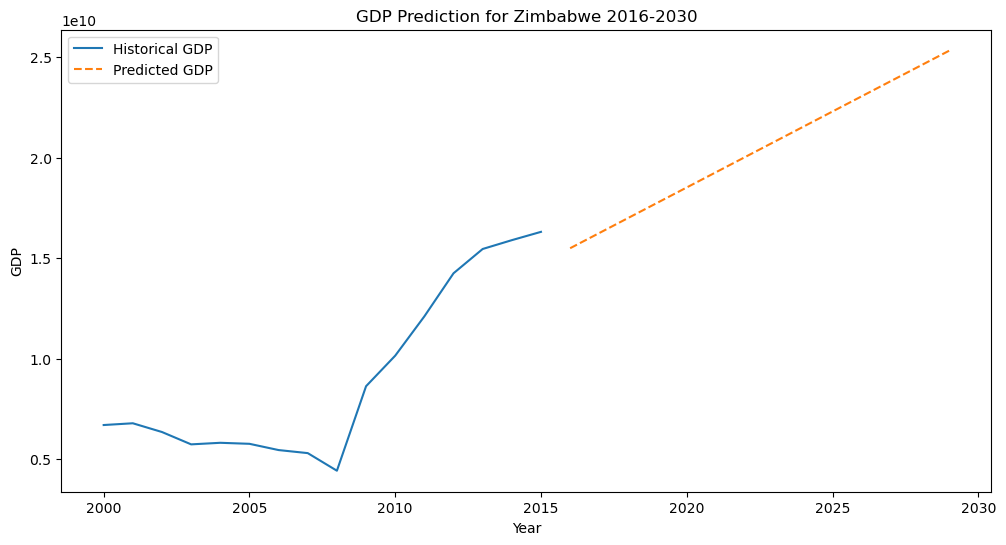

In [21]:
# Machine learning model fitting and visualization of the prediction on GDP per country

for i in countries:
    years_from_df = df1[df1.country == i]['year'].values.reshape(-1, 1)
    gdp = df1[df1.country == i]['gdp'].values
    model_gdp = LinearRegression()
    model_gdp.fit(years_from_df, gdp)
    gdp_predictions = model_gdp.predict(future_years)
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=df1[df1.country == i], x='year', y='gdp', label='Historical GDP')
    plt.plot(future_years, gdp_predictions, label='Predicted GDP', linestyle='--')
    plt.xlabel('Year')
    plt.ylabel('GDP')
    plt.title(f'GDP Prediction for {i} 2016-2030')
    plt.legend()
    plt.show()

## 6. Conclusions

On life expectancy at birth, we can conclude that all countries grow in this aspect along the years. Zimbabwe has some variation here, as on the data its life expectancy at birth begins decreasing from 2000 to 2004, and then it starts growing again until 2015. Doing some exploratory research, I found that Zimbabwe was under the strike of an economic crisis starting at 2000, so this evolution makes sense. 

On GDP, Zimbabwe and Chile have very low GDP compared to the rest of the countries. Mexico, China and Germany have a higher GDP, and United States plays in a higher league. Its minimum GDP in 2000 is far higher than any GDP value for the rest of the countries from 2000-2015. 

Looking how the variation on life expectancy is per contry, we find that Mexico has the less variation, with values from 74.8 to 76.7 (less than 2 years of difference in sixteen years). On the other hand, Zimbabwe has the bigger variation, from 44.3 (its lowest value in 2004) to 60.7. 

When looking to the GDP variation, Zimbabwe and Chile are on the lowest variation. On the opposite side, China and United States are the ones which have grown more. 

Searching for mean values, the mean life expectancy for all contries except Zimbabwe is very similar. Zimbabwe has a lower mean value. On the other hand, mean GDPs per country are very aloof.

The different relation between life expectancy and GDP per country can be seen in the graph named 'Life expectancy at birth against GDP on six countries'.

Last but not least, the visualization of the models to predict life expectancy at birth and GDP from 2016 to 2030, compared to the real registered values from 2000 to 2015, show us the expected evolution on these variables in the future.

## 7. References

1. [Life expectancy at birth definition](https://www.who.int/data/gho/data/indicators/indicator-details/GHO/life-expectancy-at-birth-(years)). Consulted November 4th, 2023. 
2. [Gross domestic product (GDP) definition](https://data.oecd.org/gdp/gross-domestic-product-gdp.htm). Consulted November 4th, 2023. 
3. [Zimbabwe on Wikipedia](https://en.wikipedia.org/wiki/Zimbabwe). Consulted November 6th, 2023. 